# Venn diagram and summary

In [1]:
import numpy as np
import pandas as pd
from venn import venn
from matplotlib import pyplot as plt

## Prepare data

In [2]:
def limiting_features(set_dict, f1, f2):
    xx = len(set_dict[f1] & set_dict[f2]) / len(set_dict[f2]) * 100
    print("Comparing %s with %s: %0.2f%%" % (f1, f2, xx))
    print("Features in common: %d" % len(set_dict[f1] & set_dict[f2]))

### Load PGC2+CLOZUK GWAS

In [3]:
pgc2_file = '/ceph/projects/v4_phase3_paper/inputs/sz_gwas/'+\
           'pgc2_clozuk/map_phase3/_m/libd_hg38_pgc2sz_snps.tsv'
pgc2_df = pd.read_csv(pgc2_file, sep='\t', low_memory=False, index_col=0)

/home/jbenja13/.local/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


### With no MHC

#### Genes

In [4]:
genes = pd.read_csv('/ceph/projects/v4_phase3_paper/analysis/twas/'+\
                    'gene_weights/fusion_pgc2/summary_stats/_m/fusion_associations_noMHC.txt', sep='\t')
annot = pd.read_csv('../../../differential_expression/_m/genes/diffExpr_szVctl_full.txt', sep='\t')
genes = annot[['ensemblID']].merge(genes, left_on='ensemblID', right_on='FILE')
genes = genes[['FILE', 'ensemblID', 'ID', 'HSQ', 'BEST.GWAS.ID', 'EQTL.ID', 
               'TWAS.Z', 'TWAS.P', 'FDR', 'Bonferroni']]
genes['Type'] = 'Gene'
genes.rename(columns={'FILE': 'Feature'}, inplace=True)
genes.sort_values('TWAS.P').head(2)

,Feature,ensemblID,ID,HSQ,BEST.GWAS.ID,EQTL.ID,TWAS.Z,TWAS.P,FDR,Bonferroni,Type
3154,ENSG00000100138,ENSG00000100138,SNU13,0.071722,chr22:41944840:T:C,chr22:42069256:T:C,-8.100041,5.494072e-16,4.437562e-12,4.437562e-12,Gene
4190,ENSG00000088808,ENSG00000088808,PPP1R13B,0.269173,chr14:103847845:G:A,chr14:103756555:C:T,7.012638,2.338656e-12,8.058985e-09,1.888933e-08,Gene


#### Transcripts

In [5]:
trans = pd.read_csv('/ceph/projects/v4_phase3_paper/analysis/twas/'+\
                    'transcript_weights/fusion_pgc2/summary_stats/_m/fusion_associations_noMHC.txt', sep='\t')
annot = pd.read_csv('../../../differential_expression/_m/transcripts/diffExpr_szVctl_full.txt', sep='\t')
annot['ensemblID'] = annot.gene_id.str.replace('\\..*', '', regex=True)
annot['FILE'] = annot.transcript_id.str.replace('\\..*', '', regex=True)
trans = annot[['ensemblID', 'FILE']].merge(trans, on='FILE')
trans = trans[['FILE', 'ensemblID', 'ID', 'HSQ', 'BEST.GWAS.ID', 'EQTL.ID', 
               'TWAS.Z', 'TWAS.P', 'FDR', 'Bonferroni']]
trans['Type'] = 'Transcript'
trans.rename(columns={'FILE': 'Feature'}, inplace=True)
trans.sort_values('TWAS.P').head(2)

,Feature,ensemblID,ID,HSQ,BEST.GWAS.ID,EQTL.ID,TWAS.Z,TWAS.P,FDR,Bonferroni,Type
2276,ENST00000433628,ENSG00000148842,CNNM2,0.077605,chr10:103092132:T:C,chr10:103085115:T:C,7.652389,1.972789e-14,2.180951e-10,2.856796e-10,Transcript
13474,ENST00000553286,ENSG00000126214,KLC1,0.430065,chr14:103847845:G:A,chr14:103673689:C:T,-7.597796,3.012155e-14,2.180951e-10,4.361902e-10,Transcript


#### Exons

In [6]:
exons = pd.read_csv('/ceph/projects/v4_phase3_paper/analysis/twas/'+\
                    'exon_weights/fusion_pgc2/summary_stats/_m/fusion_associations_noMHC.txt', sep='\t')
annot = pd.read_csv('../../../differential_expression/_m/exons/diffExpr_szVctl_full.txt', sep='\t', index_col=0)
exons = annot[['ensemblID']].merge(exons, left_index=True, right_on='FILE')
exons = exons[['FILE', 'ensemblID', 'ID', 'HSQ', 'BEST.GWAS.ID', 'EQTL.ID', 
               'TWAS.Z', 'TWAS.P', 'FDR', 'Bonferroni']]
exons['Type'] = 'Exon'
exons.rename(columns={'FILE': 'Feature'}, inplace=True)
exons.sort_values('TWAS.P').head(2)

,Feature,ensemblID,ID,HSQ,BEST.GWAS.ID,EQTL.ID,TWAS.Z,TWAS.P,FDR,Bonferroni,Type
65506,e177288,ENSG00000162971,TYW5,0.042222,chr2:199850665:T:G,chr2:200108846:G:A,-7.961678,1.697215e-15,4.032619e-11,1.132908e-10,Exon
65508,e177302,ENSG00000162971,TYW5,0.042222,chr2:199850665:T:G,chr2:200108846:G:A,-7.961678,1.697215e-15,4.032619e-11,1.132908e-10,Exon


### Junctions

In [7]:
dj_file = '../../../differential_expression/_m/junctions/diffExpr_szVctl_full.txt'
dj = pd.read_csv(dj_file, sep='\t', index_col=0)
dj = dj[['Symbol', 'ensemblID']]

jannot_file = '/ceph/projects/v4_phase3_paper/analysis/twas/'+\
             '_m/junctions/jxn_annotation.tsv'
jannot = pd.read_csv(jannot_file, sep='\t', index_col=1)

jannot = jannot[['JxnID']]
annot = pd.merge(jannot, dj, left_index=True, right_index=True)

juncs = pd.read_csv('/ceph/projects/v4_phase3_paper/analysis/twas/'+\
                    'junction_weights/fusion_pgc2/summary_stats/_m/fusion_associations_noMHC.txt', sep='\t')
juncs = pd.merge(annot, juncs, left_on='JxnID', right_on='FILE')
juncs = juncs[['FILE', 'ensemblID', 'Symbol', 'HSQ', 'BEST.GWAS.ID', 'EQTL.ID', 
               'TWAS.Z', 'TWAS.P', 'FDR', 'Bonferroni']]
juncs['Type'] = 'Junction'
juncs.rename(columns={'Symbol': 'ID', 'FILE': 'Feature'}, inplace=True)
juncs.sort_values('TWAS.P').head(2)

/usr/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Feature,ensemblID,ID,HSQ,BEST.GWAS.ID,EQTL.ID,TWAS.Z,TWAS.P,FDR,Bonferroni,Type
2595,j17393,ENSG00000270316,BORCS7-ASMT,0.150648,chr10:103092132:T:C,chr10:102911075:C:A,-9.579719,9.730918e-22,2.237430e-17,2.237430e-17,Junction
2593,j17391,NaN,NaN,0.226750,chr10:103092132:T:C,chr10:102911075:C:A,-8.094280,5.760397e-16,5.242528e-12,1.324488e-11,Junction


## Heritable features

### Feature summary

In [8]:
gg = len(set(genes['Feature']))
tt = len(set(trans['Feature']))
ee = len(set(exons['Feature']))
jj = len(set(juncs['Feature']))

print("===Unique Features===\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d\n" % (gg, tt, ee, jj)) 

gg = len(set(genes['ensemblID']))
tt = len(set(trans['ensemblID']))
ee = len(set(exons['ensemblID']))
jj = len(set(juncs['ensemblID']))

print("===Unique Ensembl Gene===\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d\n" % (gg, tt, ee, jj)) 

gg = len(set(genes['ID']))
tt = len(set(trans['ID']))
ee = len(set(exons['ID']))
jj = len(set(juncs['ID']))

print("===Unique Gene Name===\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d\n" % (gg, tt, ee, jj)) 

===Unique Features===
Gene:		8077
Transcript:	14481
Exon:		66751
Junction:	22993

===Unique Ensembl Gene===
Gene:		8077
Transcript:	8848
Exon:		10496
Junction:	5838

===Unique Gene Name===
Gene:		8076
Transcript:	8842
Exon:		12375
Junction:	5836



### Plot venn

In [9]:
features = {
    'Genes': set(genes['ensemblID']),
    'Transcripts': set(trans['ensemblID']),
    'Exons': set(exons['ensemblID']),
    'Junctions': set(juncs['ensemblID']),
}

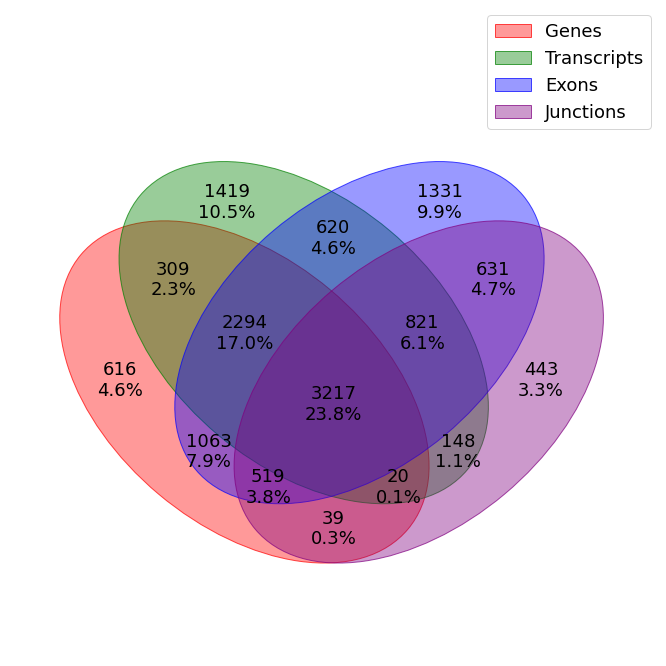

In [10]:
venn(features, fmt="{size}\n{percentage:0.1f}%", fontsize=18, legend_loc="best", 
     figsize=(12, 12), cmap=['red', 'green', 'blue', 'purple'])
plt.savefig('heritable_allFeatures_venn_diagram_percentage.png')
plt.savefig('heritable_allFeatures_venn_diagram_percentage.pdf')
plt.savefig('heritable_allFeatures_venn_diagram_percentage.svg')
plt.show()

In [11]:
limiting_features(features, 'Genes', 'Transcripts')
limiting_features(features, 'Genes', 'Junctions')
limiting_features(features, 'Exons', 'Genes')

Comparing Genes with Transcripts: 66.00%
Features in common: 5840
Comparing Genes with Junctions: 65.01%
Features in common: 3795
Comparing Exons with Genes: 87.82%
Features in common: 7093


In [12]:
limiting_features(features, 'Transcripts', 'Junctions')
limiting_features(features, 'Exons', 'Transcripts')
limiting_features(features, 'Exons', 'Junctions')

Comparing Transcripts with Junctions: 72.05%
Features in common: 4206
Comparing Exons with Transcripts: 78.57%
Features in common: 6952
Comparing Exons with Junctions: 88.87%
Features in common: 5188


In [13]:
len(features['Genes'] & features['Transcripts'] & features['Exons'] & features['Junctions'])

3217

In [14]:
len(features['Genes'] | features['Transcripts'] | features['Exons'] | features['Junctions'])

13490

### SNPs not in significant PGC2+CLOZUK GWAS

In [15]:
new_genes = pd.merge(genes, pgc2_df, left_on='BEST.GWAS.ID', right_on='our_snp_id', suffixes=['_TWAS', '_PGC2'])
new_trans = pd.merge(trans, pgc2_df, left_on='BEST.GWAS.ID', right_on='our_snp_id', suffixes=['_TWAS', '_PGC2'])
new_exons = pd.merge(exons, pgc2_df, left_on='BEST.GWAS.ID', right_on='our_snp_id', suffixes=['_TWAS', '_PGC2'])
new_juncs = pd.merge(juncs, pgc2_df, left_on='BEST.GWAS.ID', right_on='our_snp_id', suffixes=['_TWAS', '_PGC2'])

new_genes = new_genes[(new_genes['P'] > 5e-8)].copy()
new_trans = new_trans[(new_trans['P'] > 5e-8)].copy()
new_exons = new_exons[(new_exons['P'] > 5e-8)].copy()
new_juncs = new_juncs[(new_juncs['P'] > 5e-8)].copy()

In [16]:
gg = len(set(new_genes['BEST.GWAS.ID']))
tt = len(set(new_trans['BEST.GWAS.ID']))
ee = len(set(new_exons['BEST.GWAS.ID']))
jj = len(set(new_juncs['BEST.GWAS.ID']))

print("===Unique novel SNPs===\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d\n" % (gg, tt, ee, jj)) 

===Unique novel SNPs===
Gene:		2800
Transcript:	3005
Exon:		3727
Junction:	2994



In [17]:
len(set(new_genes['BEST.GWAS.ID']) | set(new_trans['BEST.GWAS.ID']) | 
    set(new_exons['BEST.GWAS.ID']) | set(new_juncs['BEST.GWAS.ID']))

4345

## TWAS P-value < 0.05

### Feature summary

In [18]:
gg = len(set(genes[(genes['TWAS.P'] <= 0.05)].loc[:, 'Feature']))
tt = len(set(trans[(trans['TWAS.P'] <= 0.05)].loc[:, 'Feature']))
ee = len(set(exons[(exons['TWAS.P'] <= 0.05)].loc[:, 'Feature']))
jj = len(set(juncs[(juncs['TWAS.P'] <= 0.05)].loc[:, 'Feature']))

print("===Unique Features===\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d\n" % (gg, tt, ee, jj)) 

gg = len(set(genes[(genes['TWAS.P'] <= 0.05)].loc[:, 'ensemblID']))
tt = len(set(trans[(trans['TWAS.P'] <= 0.05)].loc[:, 'ensemblID']))
ee = len(set(exons[(exons['TWAS.P'] <= 0.05)].loc[:, 'ensemblID']))
jj = len(set(juncs[(juncs['TWAS.P'] <= 0.05)].loc[:, 'ensemblID']))

print("===Unique Ensembl Gene===\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d\n" % (gg, tt, ee, jj)) 

gg = len(set(genes[(genes['TWAS.P'] <= 0.05)].loc[:, 'ID']))
tt = len(set(trans[(trans['TWAS.P'] <= 0.05)].loc[:, 'ID']))
ee = len(set(exons[(exons['TWAS.P'] <= 0.05)].loc[:, 'ID']))
jj = len(set(juncs[(juncs['TWAS.P'] <= 0.05)].loc[:, 'ID']))

print("===Unique Gene Names===\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d\n" % (gg, tt, ee, jj)) 

===Unique Features===
Gene:		1555
Transcript:	2934
Exon:		13617
Junction:	4593

===Unique Ensembl Gene===
Gene:		1555
Transcript:	2182
Exon:		3413
Junction:	1862

===Unique Gene Names===
Gene:		1555
Transcript:	2180
Exon:		3688
Junction:	1862



### Plot venn

In [19]:
features = {
    'Genes': set(genes[(genes['TWAS.P'] <= 0.05)].loc[:, 'ensemblID']),
    'Transcripts': set(trans[(trans['TWAS.P'] <= 0.05)].loc[:, 'ensemblID']),
    'Exons': set(exons[(exons['TWAS.P'] <= 0.05)].loc[:, 'ensemblID']),
    'Junctions': set(juncs[(juncs['TWAS.P'] <= 0.05)].loc[:, 'ensemblID']),
}

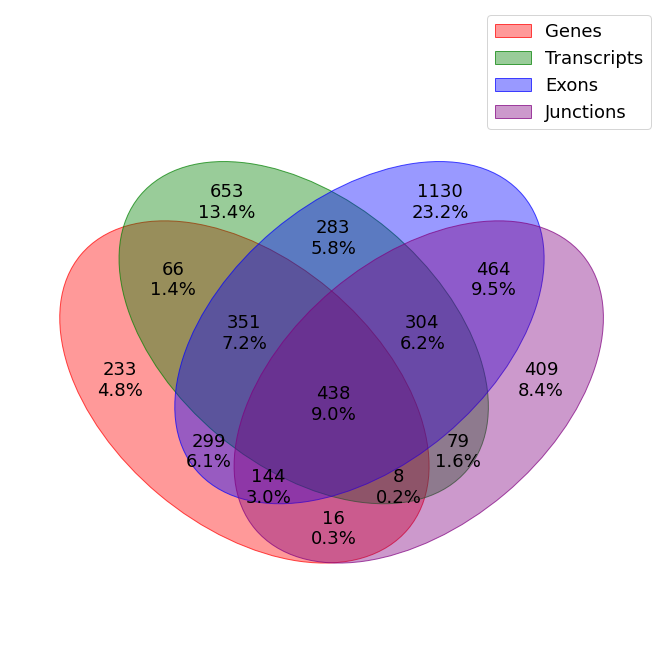

In [20]:
venn(features, fmt="{size}\n{percentage:0.1f}%", fontsize=18, legend_loc="best", 
     figsize=(12, 12), cmap=['red', 'green', 'blue', 'purple'])
plt.savefig('sigPval_allFeatures_venn_diagram_percentage.png')
plt.savefig('sigPval_allFeatures_venn_diagram_percentage.pdf')
plt.savefig('sigPval_allFeatures_venn_diagram_percentage.svg')
plt.show()

In [21]:
limiting_features(features, 'Genes', 'Transcripts')
limiting_features(features, 'Genes', 'Junctions')
limiting_features(features, 'Exons', 'Genes')

Comparing Genes with Transcripts: 39.55%
Features in common: 863
Comparing Genes with Junctions: 32.55%
Features in common: 606
Comparing Exons with Genes: 79.23%
Features in common: 1232


In [22]:
limiting_features(features, 'Transcripts', 'Junctions')
limiting_features(features, 'Exons', 'Transcripts')
limiting_features(features, 'Exons', 'Junctions')

Comparing Transcripts with Junctions: 44.52%
Features in common: 829
Comparing Exons with Transcripts: 63.06%
Features in common: 1376
Comparing Exons with Junctions: 72.50%
Features in common: 1350


In [23]:
len(features['Genes'] & features['Transcripts'] & features['Exons'] & features['Junctions'])

438

In [24]:
len(features['Genes'] | features['Transcripts'] | features['Exons'] | features['Junctions'])

4877

### SNPs not in significant PGC2+CLOZUK GWAS

In [25]:
new_genes = pd.merge(genes[(genes['TWAS.P'] <= 0.05)], pgc2_df, left_on='BEST.GWAS.ID', 
                     right_on='our_snp_id', suffixes=['_TWAS', '_PGC2'])
new_trans = pd.merge(trans[(trans['TWAS.P'] <= 0.05)], pgc2_df, left_on='BEST.GWAS.ID', 
                     right_on='our_snp_id', suffixes=['_TWAS', '_PGC2'])
new_exons = pd.merge(exons[(exons['TWAS.P'] <= 0.05)], pgc2_df, left_on='BEST.GWAS.ID', 
                     right_on='our_snp_id', suffixes=['_TWAS', '_PGC2'])
new_juncs = pd.merge(juncs[(juncs['TWAS.P'] <= 0.05)], pgc2_df, left_on='BEST.GWAS.ID', 
                     right_on='our_snp_id', suffixes=['_TWAS', '_PGC2'])

new_genes = new_genes[(new_genes['P'] > 5e-8)].copy()
new_trans = new_trans[(new_trans['P'] > 5e-8)].copy()
new_exons = new_exons[(new_exons['P'] > 5e-8)].copy()
new_juncs = new_juncs[(new_juncs['P'] > 5e-8)].copy()

In [26]:
gg = len(set(new_genes['BEST.GWAS.ID']))
tt = len(set(new_trans['BEST.GWAS.ID']))
ee = len(set(new_exons['BEST.GWAS.ID']))
jj = len(set(new_juncs['BEST.GWAS.ID']))

print("===Unique novel SNPs===\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d\n" % (gg, tt, ee, jj)) 

===Unique novel SNPs===
Gene:		811
Transcript:	1059
Exon:		1600
Junction:	1127



In [27]:
len(set(new_genes['BEST.GWAS.ID']) | set(new_trans['BEST.GWAS.ID']) | 
    set(new_exons['BEST.GWAS.ID']) | set(new_juncs['BEST.GWAS.ID']))

2045

## TWAS FDR < 0.05

### Feature summary

In [28]:
gg = len(set(genes[(genes['FDR'] <= 0.05)].loc[:, 'Feature']))
tt = len(set(trans[(trans['FDR'] <= 0.05)].loc[:, 'Feature']))
ee = len(set(exons[(exons['FDR'] <= 0.05)].loc[:, 'Feature']))
jj = len(set(juncs[(juncs['FDR'] <= 0.05)].loc[:, 'Feature']))

print("===Unique Features===\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d\n" % (gg, tt, ee, jj)) 

gg = len(set(genes[(genes['FDR'] <= 0.05)].loc[:, 'ensemblID']))
tt = len(set(trans[(trans['FDR'] <= 0.05)].loc[:, 'ensemblID']))
ee = len(set(exons[(exons['FDR'] <= 0.05)].loc[:, 'ensemblID']))
jj = len(set(juncs[(juncs['FDR'] <= 0.05)].loc[:, 'ensemblID']))

print("===Unique Ensembl Gene===\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d\n" % (gg, tt, ee, jj)) 

gg = len(set(genes[(genes['FDR'] <= 0.05)].loc[:, 'ID']))
tt = len(set(trans[(trans['FDR'] <= 0.05)].loc[:, 'ID']))
ee = len(set(exons[(exons['FDR'] <= 0.05)].loc[:, 'ID']))
jj = len(set(juncs[(juncs['FDR'] <= 0.05)].loc[:, 'ID']))

print("===Unique Gene Name===\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d\n" % (gg, tt, ee, jj)) 

===Unique Features===
Gene:		561
Transcript:	1116
Exon:		4865
Junction:	1657

===Unique Ensembl Gene===
Gene:		561
Transcript:	841
Exon:		1310
Junction:	730

===Unique Gene Name===
Gene:		561
Transcript:	841
Exon:		1398
Junction:	730



### Plot venn

In [29]:
features = {
    'Genes': set(genes[(genes['FDR'] <= 0.05)].loc[:, 'ensemblID']),
    'Transcripts': set(trans[(trans['FDR'] <= 0.05)].loc[:, 'ensemblID']),
    'Exons': set(exons[(exons['FDR'] <= 0.05)].loc[:, 'ensemblID']),
    'Junctions': set(juncs[(juncs['FDR'] <= 0.05)].loc[:, 'ensemblID']),
}

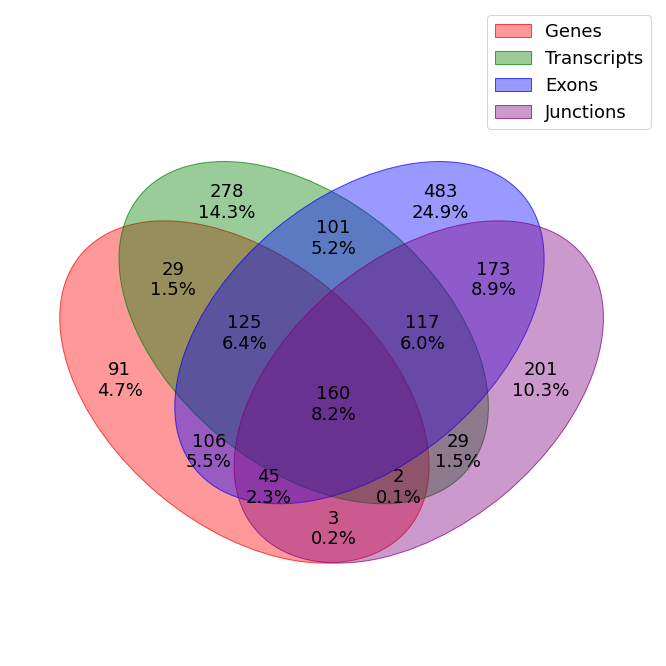

In [30]:
venn(features, fmt="{size}\n{percentage:0.1f}%", fontsize=18, legend_loc="best", 
     figsize=(12, 12), cmap=['red', 'green', 'blue', 'purple'])
plt.savefig('fdr_allFeatures_venn_diagram_percentage.png')
plt.savefig('fdr_allFeatures_venn_diagram_percentage.pdf')
plt.savefig('fdr_allFeatures_venn_diagram_percentage.svg')
plt.show()

In [31]:
limiting_features(features, 'Genes', 'Transcripts')
limiting_features(features, 'Genes', 'Junctions')
limiting_features(features, 'Exons', 'Genes')

Comparing Genes with Transcripts: 37.57%
Features in common: 316
Comparing Genes with Junctions: 28.77%
Features in common: 210
Comparing Exons with Genes: 77.72%
Features in common: 436


In [32]:
limiting_features(features, 'Transcripts', 'Junctions')
limiting_features(features, 'Exons', 'Transcripts')
limiting_features(features, 'Exons', 'Junctions')

Comparing Transcripts with Junctions: 42.19%
Features in common: 308
Comparing Exons with Transcripts: 59.81%
Features in common: 503
Comparing Exons with Junctions: 67.81%
Features in common: 495


In [33]:
len(features['Genes'] & features['Transcripts'] & features['Exons'] & features['Junctions'])

160

In [34]:
len(features['Genes'] | features['Transcripts'] | features['Exons'] | features['Junctions'])

1943

### SNPs not in significant PGC2+CLOZUK GWAS

In [35]:
new_genes = pd.merge(genes[(genes['FDR'] <= 0.05)], pgc2_df, left_on='BEST.GWAS.ID', 
                     right_on='our_snp_id', suffixes=['_TWAS', '_PGC2'])
new_trans = pd.merge(trans[(trans['FDR'] <= 0.05)], pgc2_df, left_on='BEST.GWAS.ID', 
                     right_on='our_snp_id', suffixes=['_TWAS', '_PGC2'])
new_exons = pd.merge(exons[(exons['FDR'] <= 0.05)], pgc2_df, left_on='BEST.GWAS.ID', 
                     right_on='our_snp_id', suffixes=['_TWAS', '_PGC2'])
new_juncs = pd.merge(juncs[(juncs['FDR'] <= 0.05)], pgc2_df, left_on='BEST.GWAS.ID', 
                     right_on='our_snp_id', suffixes=['_TWAS', '_PGC2'])

new_genes = new_genes[(new_genes['P'] > 5e-8)].copy()
new_trans = new_trans[(new_trans['P'] > 5e-8)].copy()
new_exons = new_exons[(new_exons['P'] > 5e-8)].copy()
new_juncs = new_juncs[(new_juncs['P'] > 5e-8)].copy()

In [36]:
gg = len(set(new_genes['BEST.GWAS.ID']))
tt = len(set(new_trans['BEST.GWAS.ID']))
ee = len(set(new_exons['BEST.GWAS.ID']))
jj = len(set(new_juncs['BEST.GWAS.ID']))

print("===Unique novel SNPs===\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d\n" % (gg, tt, ee, jj)) 

===Unique novel SNPs===
Gene:		254
Transcript:	375
Exon:		586
Junction:	407



In [37]:
len(set(new_genes['BEST.GWAS.ID']) | set(new_trans['BEST.GWAS.ID']) | 
    set(new_exons['BEST.GWAS.ID']) | set(new_juncs['BEST.GWAS.ID']))

783

## TWAS Bonferroni < 0.05

### Feature summary

In [38]:
gg = len(set(genes[(genes['Bonferroni'] <= 0.05)].loc[:, 'Feature']))
tt = len(set(trans[(trans['Bonferroni'] <= 0.05)].loc[:, 'Feature']))
ee = len(set(exons[(exons['Bonferroni'] <= 0.05)].loc[:, 'Feature']))
jj = len(set(juncs[(juncs['Bonferroni'] <= 0.05)].loc[:, 'Feature']))

print("===Unique Features===\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d\n" % (gg, tt, ee, jj)) 

gg = len(set(genes[(genes['Bonferroni'] <= 0.05)].loc[:, 'ensemblID']))
tt = len(set(trans[(trans['Bonferroni'] <= 0.05)].loc[:, 'ensemblID']))
ee = len(set(exons[(exons['Bonferroni'] <= 0.05)].loc[:, 'ensemblID']))
jj = len(set(juncs[(juncs['Bonferroni'] <= 0.05)].loc[:, 'ensemblID']))

print("===Unique Ensembl Gene===\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d\n" % (gg, tt, ee, jj)) 

gg = len(set(genes[(genes['Bonferroni'] <= 0.05)].loc[:, 'ID']))
tt = len(set(trans[(trans['Bonferroni'] <= 0.05)].loc[:, 'ID']))
ee = len(set(exons[(exons['Bonferroni'] <= 0.05)].loc[:, 'ID']))
jj = len(set(juncs[(juncs['Bonferroni'] <= 0.05)].loc[:, 'ID']))

print("===Unique Gene Name===\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d\n" % (gg, tt, ee, jj)) 

===Unique Features===
Gene:		81
Transcript:	158
Exon:		448
Junction:	211

===Unique Ensembl Gene===
Gene:		81
Transcript:	129
Exon:		135
Junction:	110

===Unique Gene Name===
Gene:		81
Transcript:	129
Exon:		143
Junction:	110



### Plot venn

In [39]:
features = {
    'Genes': set(genes[(genes['Bonferroni'] <= 0.05)].loc[:, 'ensemblID']),
    'Transcripts': set(trans[(trans['Bonferroni'] <= 0.05)].loc[:, 'ensemblID']),
    'Exons': set(exons[(exons['Bonferroni'] <= 0.05)].loc[:, 'ensemblID']),
    'Junctions': set(juncs[(juncs['Bonferroni'] <= 0.05)].loc[:, 'ensemblID']),
}

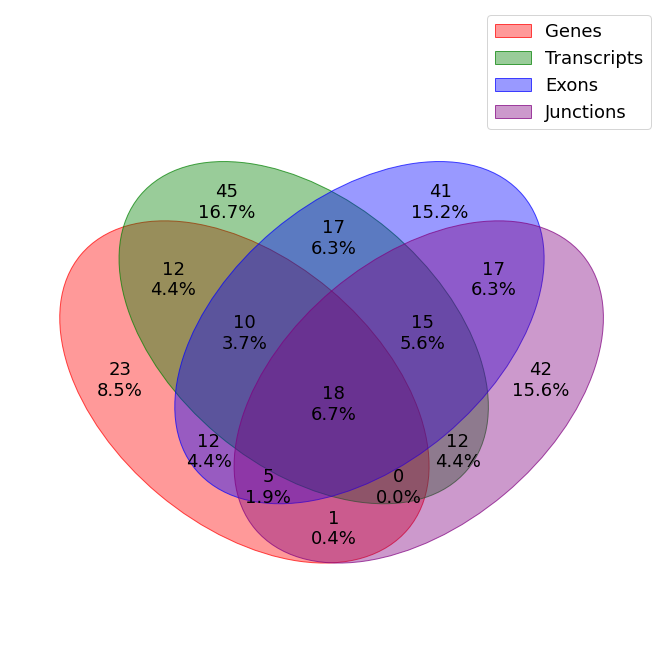

In [40]:
venn(features, fmt="{size}\n{percentage:0.1f}%", fontsize=18, legend_loc="best", 
     figsize=(12, 12), cmap=['red', 'green', 'blue', 'purple'])
plt.savefig('bonferroni_allFeatures_venn_diagram_percentage.png')
plt.savefig('bonferroni_allFeatures_venn_diagram_percentage.pdf')
plt.savefig('bonferroni_allFeatures_venn_diagram_percentage.svg')
plt.show()

In [41]:
limiting_features(features, 'Genes', 'Transcripts')
limiting_features(features, 'Genes', 'Junctions')
limiting_features(features, 'Exons', 'Genes')

Comparing Genes with Transcripts: 31.01%
Features in common: 40
Comparing Genes with Junctions: 21.82%
Features in common: 24
Comparing Exons with Genes: 55.56%
Features in common: 45


In [42]:
limiting_features(features, 'Transcripts', 'Junctions')
limiting_features(features, 'Exons', 'Transcripts')
limiting_features(features, 'Exons', 'Junctions')

Comparing Transcripts with Junctions: 40.91%
Features in common: 45
Comparing Exons with Transcripts: 46.51%
Features in common: 60
Comparing Exons with Junctions: 50.00%
Features in common: 55


In [43]:
len(features['Genes'] & features['Transcripts'] & features['Exons'] & features['Junctions'])

18

In [44]:
len(features['Genes'] | features['Transcripts'] | features['Exons'] | features['Junctions'])

270

### SNPs not in significant PGC2+CLOZUK GWAS

In [45]:
new_genes = pd.merge(genes[(genes['Bonferroni'] <= 0.05)], pgc2_df, left_on='BEST.GWAS.ID', 
                     right_on='our_snp_id', suffixes=['_TWAS', '_PGC2'])
new_trans = pd.merge(trans[(trans['Bonferroni'] <= 0.05)], pgc2_df, left_on='BEST.GWAS.ID', 
                     right_on='our_snp_id', suffixes=['_TWAS', '_PGC2'])
new_exons = pd.merge(exons[(exons['Bonferroni'] <= 0.05)], pgc2_df, left_on='BEST.GWAS.ID', 
                     right_on='our_snp_id', suffixes=['_TWAS', '_PGC2'])
new_juncs = pd.merge(juncs[(juncs['Bonferroni'] <= 0.05)], pgc2_df, left_on='BEST.GWAS.ID', 
                     right_on='our_snp_id', suffixes=['_TWAS', '_PGC2'])

new_genes = new_genes[(new_genes['P'] > 5e-8)].copy()
new_trans = new_trans[(new_trans['P'] > 5e-8)].copy()
new_exons = new_exons[(new_exons['P'] > 5e-8)].copy()
new_juncs = new_juncs[(new_juncs['P'] > 5e-8)].copy()

In [46]:
gg = len(set(new_genes['BEST.GWAS.ID']))
tt = len(set(new_trans['BEST.GWAS.ID']))
ee = len(set(new_exons['BEST.GWAS.ID']))
jj = len(set(new_juncs['BEST.GWAS.ID']))

print("===Unique novel SNPs===\nGene:\t\t%d\nTranscript:\t%d\nExon:\t\t%d\nJunction:\t%d\n" % (gg, tt, ee, jj)) 

===Unique novel SNPs===
Gene:		15
Transcript:	26
Exon:		19
Junction:	23



In [47]:
len(set(new_genes['BEST.GWAS.ID']) | set(new_trans['BEST.GWAS.ID']) | 
    set(new_exons['BEST.GWAS.ID']) | set(new_juncs['BEST.GWAS.ID']))

53

## Session Information

In [48]:
import types
from IPython import sys_info

def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__

#exclude all modules not listed by `!pip freeze`
excludes = ['__builtin__', 'types', 'IPython.core.shadowns', 'sys', 'os']
function_modules = []
imported_modules = [module for module in imports() if module not in excludes] + function_modules
pip_modules = !pip freeze #you could also use `!conda list` with anaconda

In [49]:
print(sys_info())
#print the names and versions of the imported modules
print("\nImported Modules:")
for module in pip_modules[2:]:
    name, version = module.split('==')
    if name in imported_modules:
        print(name + ':\t' + version)

{'commit_hash': '<not found>',
 'commit_source': '(none found)',
 'default_encoding': 'utf-8',
 'ipython_path': '/usr/lib/python3.9/site-packages/IPython',
 'ipython_version': '7.19.0',
 'os_name': 'posix',
 'platform': 'Linux-5.10.14-arch1-1-x86_64-with-glibc2.33',
 'sys_executable': '/usr/bin/python',
 'sys_platform': 'linux',
 'sys_version': '3.9.1 (default, Feb  6 2021, 06:49:13) \n[GCC 10.2.0]'}

Imported Modules:
numpy:	1.19.5
pandas:	1.1.5
